<a href="https://colab.research.google.com/github/necronet/Notebooks/blob/master/colab/Functional_API_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(784,))

In [4]:
inputs.shape

TensorShape([None, 784])

In [5]:
x = layers.Dense(64, activation="relu")(inputs)

x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name = "mnist_model")

model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


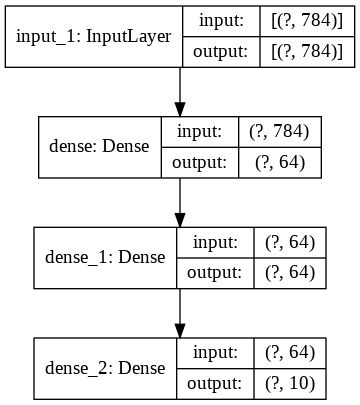

In [6]:
keras.utils.plot_model(model, "mnist.png", show_shapes= True)

In [9]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train.shape
x_train = x_train.reshape(60000, 784).astype("float32")/255
x_test = x_test.reshape(10000, 784).astype("float32")/255

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = keras.optimizers.RMSprop(),
    metrics = ["accuracy"]
)

history = model.fit(x_train, y_train, batch_size = 64, epochs = 2, validation_split = 0.2)
test_scores = model.evaluate(x_test, y_test, verbose = 2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])




Epoch 1/2
750/750 [==============================] - 2s 3ms/step - loss: 0.3571 - accuracy: 0.8994 - val_loss: 0.1836 - val_accuracy: 0.9473
Epoch 2/2
750/750 [==============================] - 2s 2ms/step - loss: 0.1598 - accuracy: 0.9525 - val_loss: 0.1559 - val_accuracy: 0.9546
313/313 - 0s - loss: 0.1530 - accuracy: 0.9547
Test loss: 0.1529584378004074
Test accuracy: 0.9546999931335449


In [11]:
model.save("keras_model_mnist.tf")
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model( "keras_model_mnist.tf")

INFO:tensorflow:Assets written to: keras_model_mnist.tf/assets


In [13]:
encoder_input = keras.Input(shape = (28,28, 1), name = "img")
x = layers.Conv2D(16,3, activation = "relu")(encoder_input)
x = layers.Conv2D(32, 3, activation = "relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation = "relu")(x)
x = layers.Conv2D(16, 3, activation = "relu")(x)

encoder_output = layers.GlobalMaxPooling2D()(x)



encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                0   

In [18]:
encoder_input = keras.Input(shape=(28, 28, 1), name="original_img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

decoder_input = keras.Input(shape=(16,), name="encoded_img")
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

decoder = keras.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()

autoencoder_input = keras.Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_3 (Glob (None, 16)                0   

In [27]:
num_tags = 12
num_word = 10000
num_departments = 4

title_input = keras.Input(shape = (None, ), name = "title")
body_input = keras.Input(shape = (None, ), name = "body")
tags_input = keras.Input(shape = (num_tags,), name = "tags")

title_features = layers.Embedding(num_word, 64)(title_input)
body_features = layers.Embedding(num_word, 64)(body_input)

title_features = layers.LSTM(128)(title_features)
body_features = layers.LSTM(128)(body_features)

x = layers.concatenate([title_features, body_features, tags_input])

priority_pred = layers.Dense(1, name="priority")(x)
department_pred = layers.Dense(num_departments, name = "department")(x)

model = keras.Model(inputs=[title_input, body_input, tags_input],
                    outputs=[priority_pred, department_pred])

model.compile(optimizer = keras.optimizers.RMSprop(1e-3), 
              loss = [keras.losses.BinaryCrossentropy(from_logits=True),
                      keras.losses.CategoricalCrossentropy(from_logits = True)],
              loss_weights = [1.0, 2.0])

                                                                                


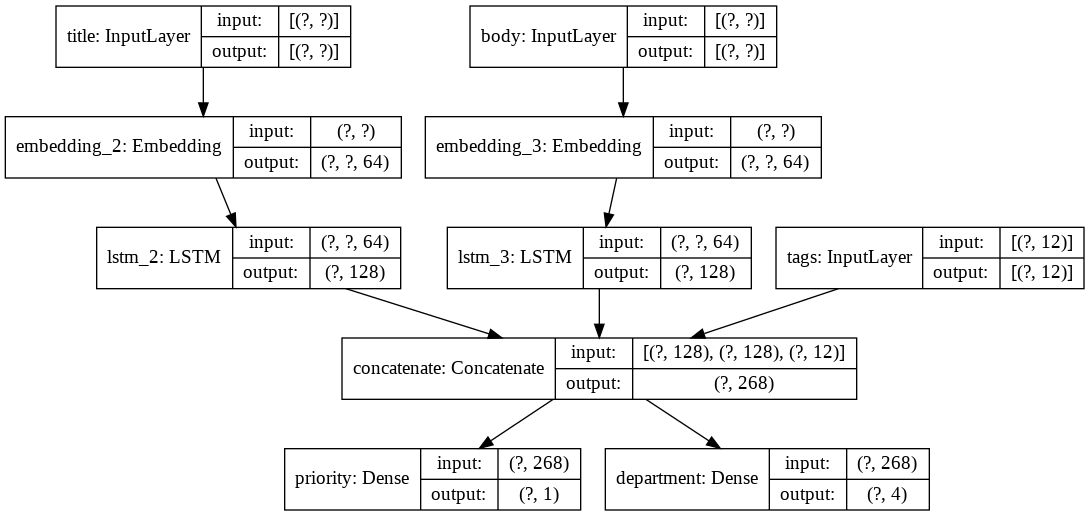

In [24]:
keras.utils.plot_model(model, "multi_input_output_model.png", show_shapes = True)

In [38]:
title_data = np.random.randint(num_word, size=(1280, 10))
body_data = np.random.randint(num_word, size=(1280, 100))
tags_data = np.random.randint(2, size=(1280, num_tags)).astype("float32")

# Dummy target data
priority_targets = np.random.random(size=(1280, 1))
dept_targets = np.random.randint(2, size=(1280, num_departments))

model.fit(
    {"title": title_data, "body": body_data, "tags": tags_data},
    {"priority": priority_targets, "department": dept_targets},
    epochs=4,
    batch_size=48,
)

Epoch 1/4
27/27 [==============================] - 5s 172ms/step - loss: 6.4009 - priority_loss: 0.6982 - department_loss: 2.8514
Epoch 2/4
27/27 [==============================] - 5s 174ms/step - loss: 6.4058 - priority_loss: 0.6989 - department_loss: 2.8535
Epoch 3/4
27/27 [==============================] - 5s 172ms/step - loss: 6.4064 - priority_loss: 0.6996 - department_loss: 2.8534
Epoch 4/4
27/27 [==============================] - 5s 173ms/step - loss: 6.4105 - priority_loss: 0.6979 - department_loss: 2.8563


In [37]:
test_scores = model.evaluate({"title": title_data, "body": body_data, "tags": tags_data},
                             {"priority": priority_targets, "department": dept_targets}, verbose = 2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

40/40 - 1s - loss: 6.1887 - priority_loss: 0.6969 - department_loss: 2.7459
Test loss: 6.188702583312988
Test accuracy: 0.6969384551048279


In [39]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 28, 28, 64)   18496       conv2d_20[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 9, 9, 64)     0           conv2d_21[0][0]                  
_________________________________________________________________________________________

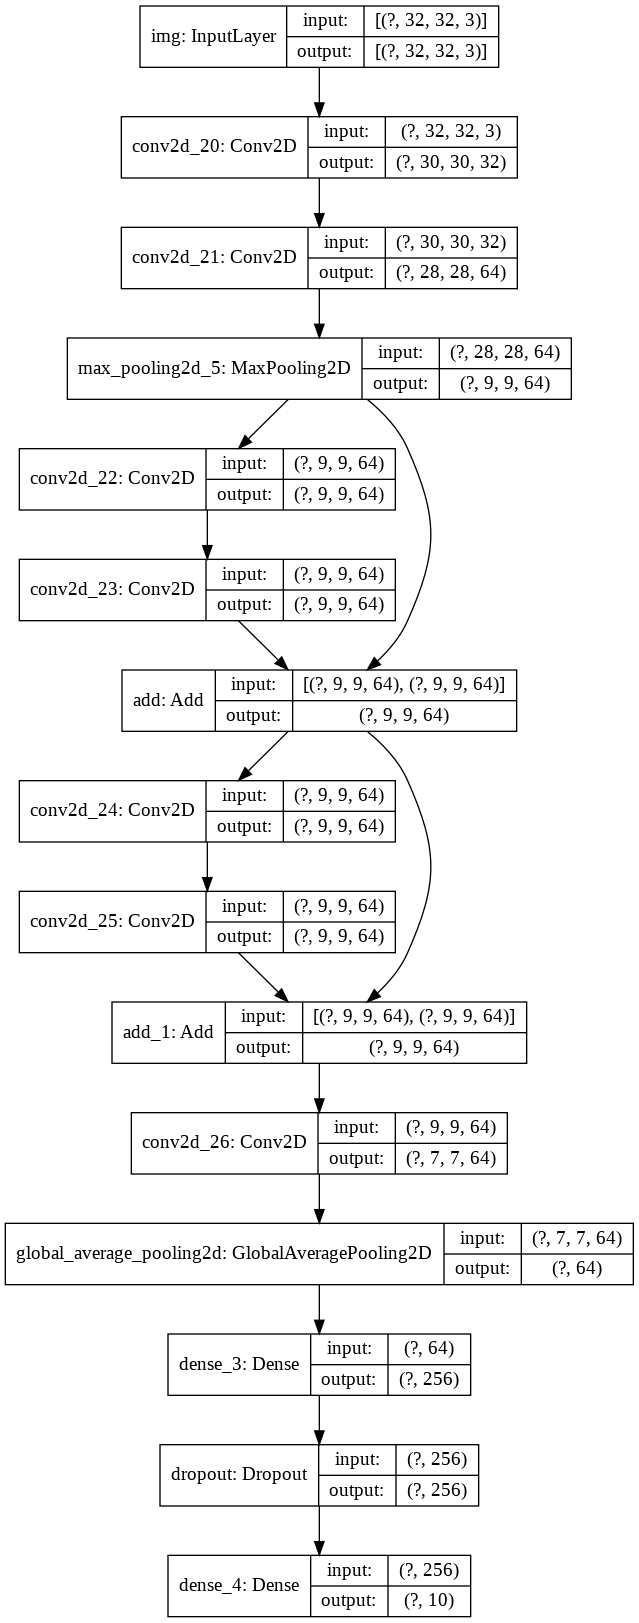

In [40]:
keras.utils.plot_model(model, "mini_resnet.png", show_shapes=True)


In [41]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["acc"],
)
# We restrict the data to the first 1000 samples so as to limit execution time
# on Colab. Try to train on the entire dataset until convergence!
model.fit(x_train[:1000], y_train[:1000], batch_size=64, epochs=1, validation_split=0.2)

13/13 [==============================] - 4s 302ms/step - loss: 2.3081 - acc: 0.0875 - val_loss: 2.2964 - val_acc: 0.1000


In [42]:
# Embedding for 1000 unique words mapped to 128-dimensional vectors
shared_embedding = layers.Embedding(1000, 128)

# Variable-length sequence of integers
text_input_a = keras.Input(shape=(None,), dtype="int32")

# Variable-length sequence of integers
text_input_b = keras.Input(shape=(None,), dtype="int32")

# Reuse the same layer to encode both inputs
encoded_input_a = shared_embedding(text_input_a)
encoded_input_b = shared_embedding(text_input_b)